In [59]:
import subprocess
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from textwrap import wrap

The following notebook assumes that it is put in the root folder of the assignment (meaning the folder that contains the subfolders `lang` and `syscalls`.

# Classifying Languages

The following chunk creates a function, which computes the AUC using the english test set as ground truth and the language file handed as a parameter for prediction. Furthermore, it provides plotting functionality.

In [60]:
def get_auc(r, lang, plot=True):
    bashCommand = f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < english.test"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,shell=True)
    english_byte, _ = process.communicate()
    bashCommand = f"java -jar negsel2.jar -self english.train -n 10 -r {r} -c -l < {lang}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,shell=True)
    anomalous_byte, _ = process.communicate()

    english = english_byte.decode("utf-8").split('\r\n')[:-1]
    anomalous = anomalous_byte.decode("utf-8").split('\r\n')[:-1]

    # Create numpy array out of strings
    e = np.zeros(shape=len(english))
    for i in range(len(english)):
        e[i] = english[i]

    # Create numpy array out of strings
    a = np.zeros(shape=len(anomalous))
    for i in range(len(anomalous)):
        a[i] = anomalous[i]

    y = np.append(np.array(list([1]*len(english))), np.array(list([2]*len(anomalous))))
    pred = np.append(e,a)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
    auc = metrics.auc(fpr, tpr)
    print(f"Value for r is: {r}; The AUC is: {auc}")
    if plot:
        plt.plot(fpr, tpr, label=f'ROC curve for {r} (area = %0.3f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate or (1 - Specifity)')
        plt.ylabel('True Positive Rate or (Sensitivity)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

The next few code chunks use the defined function from above to compute AUC values (and plots) for different languages and `r` values.

Value for r is: 4; The AUC is: 0.7916097138691454


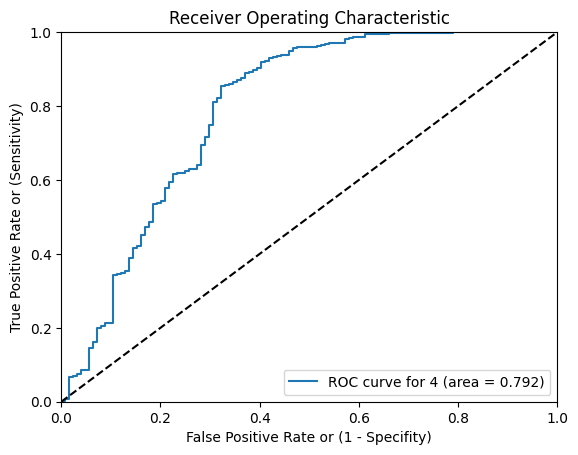

In [61]:
get_auc(r=4, lang="tagalog.test", plot=True)

Value for r is: 1; The AUC is: 0.5435347184253692


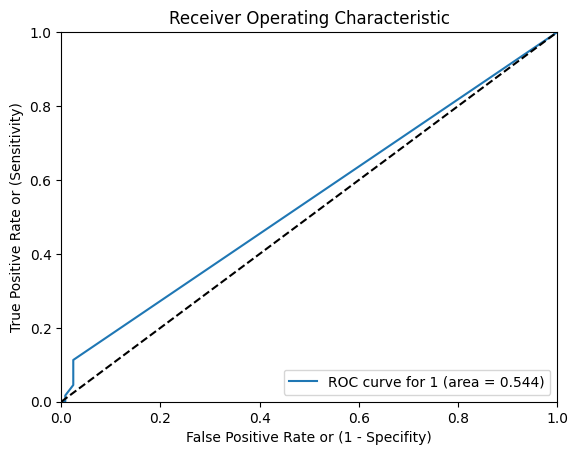

Value for r is: 2; The AUC is: 0.7396459814106069


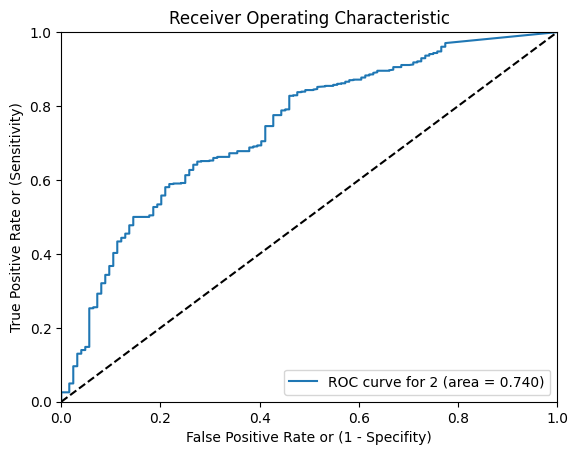

Value for r is: 3; The AUC is: 0.8311235647895024


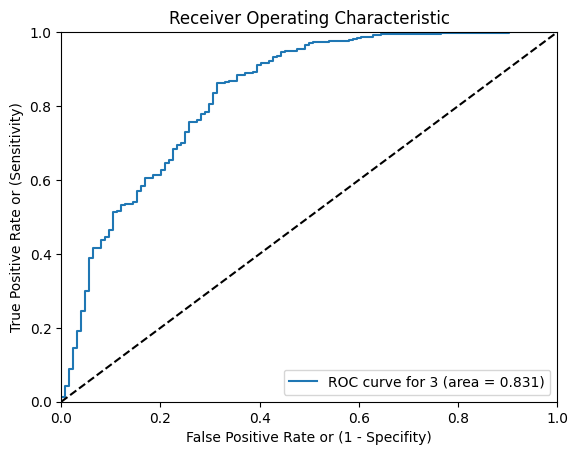

Value for r is: 4; The AUC is: 0.7916097138691454


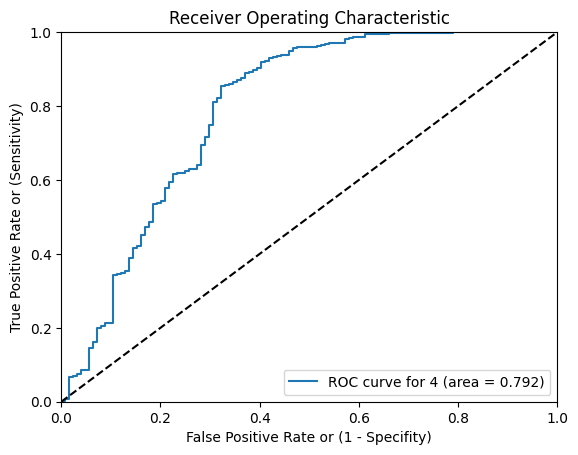

Value for r is: 5; The AUC is: 0.7282440313468198


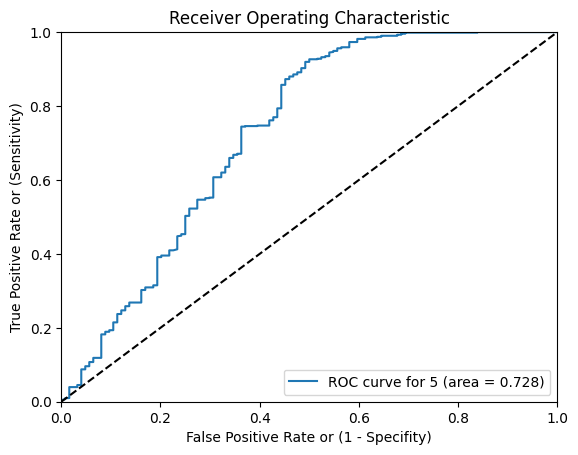

Value for r is: 6; The AUC is: 0.6680847913249499


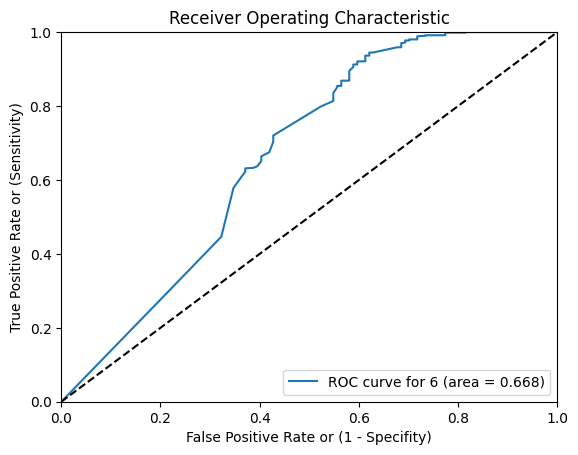

Value for r is: 7; The AUC is: 0.5907258064516129


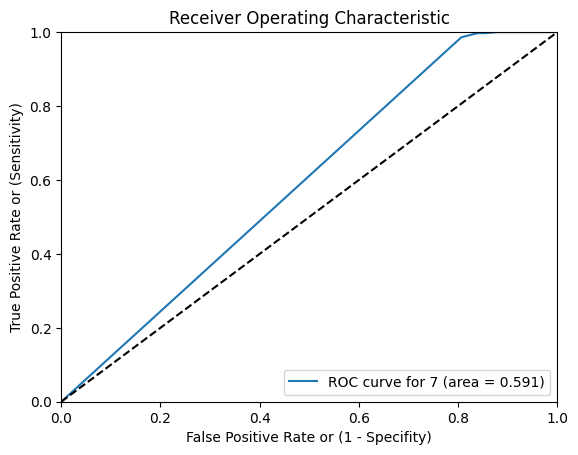

Value for r is: 8; The AUC is: 0.5201612903225806


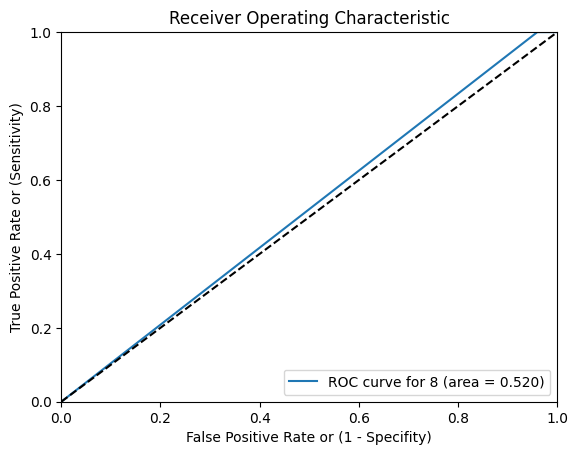

Value for r is: 9; The AUC is: 0.5120967741935484


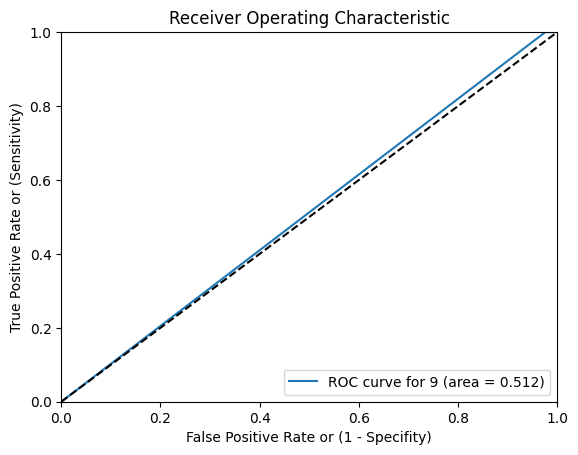

In [62]:
#for loop over r values for tagalog
for j in range(1,10,1):
    get_auc(r=j, lang="tagalog.test", plot=True)

In [63]:
#for loop over r values middle-english
for j in range(1,10,1):
    get_auc(j, "lang/middle-english.txt", plot=False)

Value for r is: 1; The AUC is: 0.5156612903225807
Value for r is: 2; The AUC is: 0.5142096774193549
Value for r is: 3; The AUC is: 0.5424435483870967
Value for r is: 4; The AUC is: 0.5338870967741935
Value for r is: 5; The AUC is: 0.5224112903225806
Value for r is: 6; The AUC is: 0.5020967741935484
Value for r is: 7; The AUC is: 0.5123951612903226
Value for r is: 8; The AUC is: 0.5084274193548387
Value for r is: 9; The AUC is: 0.5120967741935484


In [64]:
#for loop over r values xhosa
for j in range(1,10,1):
    get_auc(j, "lang/xhosa.txt", plot=False)

Value for r is: 1; The AUC is: 0.6191532258064516
Value for r is: 2; The AUC is: 0.8516935483870969
Value for r is: 3; The AUC is: 0.8893387096774193
Value for r is: 4; The AUC is: 0.832274193548387
Value for r is: 5; The AUC is: 0.7646451612903226
Value for r is: 6; The AUC is: 0.6915806451612904
Value for r is: 7; The AUC is: 0.5887661290322581
Value for r is: 8; The AUC is: 0.5201612903225806
Value for r is: 9; The AUC is: 0.5120967741935484


In [65]:
#for loop over r values plautdietsch
for j in range(1,10,1):
    get_auc(j, "lang/plautdietsch.txt", plot=False)

Value for r is: 1; The AUC is: 0.6553225806451614
Value for r is: 2; The AUC is: 0.7070403225806452
Value for r is: 3; The AUC is: 0.7746774193548387
Value for r is: 4; The AUC is: 0.7534032258064516
Value for r is: 5; The AUC is: 0.7014354838709678
Value for r is: 6; The AUC is: 0.6500725806451613
Value for r is: 7; The AUC is: 0.5855806451612904
Value for r is: 8; The AUC is: 0.5191935483870967
Value for r is: 9; The AUC is: 0.5120967741935484


In [66]:
#for loop over r values hiligaynon
for j in range(1,10,1):
    get_auc(j, "lang/hiligaynon.txt", plot=False)

Value for r is: 1; The AUC is: 0.5459596774193548
Value for r is: 2; The AUC is: 0.7519032258064516
Value for r is: 3; The AUC is: 0.839741935483871
Value for r is: 4; The AUC is: 0.7974677419354839
Value for r is: 5; The AUC is: 0.730241935483871
Value for r is: 6; The AUC is: 0.6708709677419354
Value for r is: 7; The AUC is: 0.5933306451612903
Value for r is: 8; The AUC is: 0.5201612903225806
Value for r is: 9; The AUC is: 0.5120967741935484


# Intrusion Detection for Unix Processes

Similar to the function for the languages, the following function computes the AUC, with the possibility to plot the ROC curve, depending on the input. Here Unix system calls are the input, already preprocessed in such a way that in each line there are `n` characters of system calls. Furthermore, it expects a `preprocessed.txt` (generated by a function below), that is used to compute the average value for each line of the original (not preprocessed) input file.

In [67]:
def get_auc_unix(r, original_name, lang, n=7, plot=True):
    bashCommand = f"java -jar negsel2.jar -alphabet syscall/snd-cert/snd-cert.alpha -self syscalls/snd-cert/snd-cert.train -n {n} -r {r} -c -l < {lang}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,shell=True)
    pred_command_byte, _ = process.communicate()
    label_file = original_name.rsplit('.',1)[0] + '.labels'
    labels = pd.read_csv(label_file, header=None)

    pred_command = pred_command_byte.decode("utf-8").split('\r\n')[:-1]
    labelled = pd.read_csv('preprocessed.txt', header=None)
    # Collects the predicted values for each row
    prediction_dict = {}
    for i, row in enumerate(labelled.iloc[:,0]):
        if row not in prediction_dict.keys():
            prediction_dict[row] = [float(pred_command[i])]
        else:
            prediction_dict[row].append(float(pred_command[i]))
    # Gets the mean for each row
    for key, value in prediction_dict.items():
        prediction_dict[key] = np.mean(value)
    pc = np.asarray(list(prediction_dict.values()))
    fpr, tpr, thresholds = metrics.roc_curve(labels, pc, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(f"Value for r is: {r}; The AUC is: {auc}")
    if plot:
        plt.plot(fpr, tpr, label=f'ROC curve for {r} (area = %0.3f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate or (1 - Specifity)')
        plt.ylabel('True Positive Rate or (Sensitivity)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

The following function preprocesses the unix command input file and generates two output files: `preprocessed.txt` and `input.txt`.
The files are similar and contain both the `str_len` substrings of each line in the input. The only difference between the files is, that the `preprocessed.txt` also contains the line numbers it belongs to in the original input for each substring.

In [68]:
def preprocess(lang, str_len=7):
    with open('preprocessed.txt', 'w') as writer:
        with open(lang, 'r') as file:
            lines = [line.rstrip() for line in file]
            for i, line in enumerate(lines):
                for substr_ctr in range(len(line)-str_len+1):
                    writer.write(str(i+1)+","+line[substr_ctr:substr_ctr+str_len]+"\r\n")
    labelled = pd.read_csv('preprocessed.txt')
    labelled.iloc[:,1].to_csv('input.txt', index=False)

The following code chunks contain the preprocessing and the AUC computation for all the different files provided for this assignment.

In [69]:
preprocess('syscalls/snd-cert/snd-cert.1.test')

Value for r is: 4; The AUC is: 0.9506


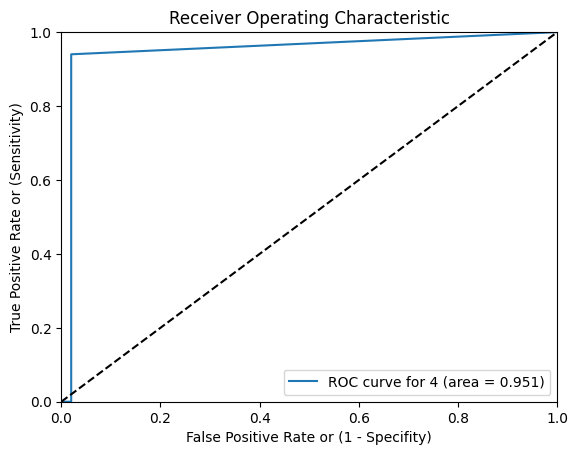

In [70]:
get_auc_unix(4, 'syscalls/snd-cert/snd-cert.1.test', 'input.txt' , plot=True)

Value for r is: 4; The AUC is: 0.97312


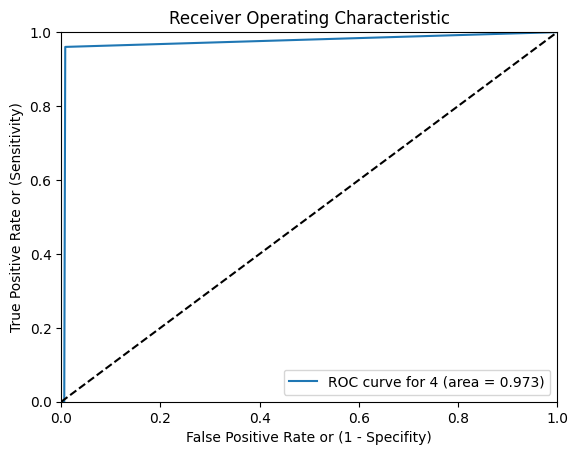

In [71]:
preprocess('syscalls/snd-cert/snd-cert.2.test')
get_auc_unix(4, 'syscalls/snd-cert/snd-cert.2.test', 'input.txt', plot=True)

Value for r is: 4; The AUC is: 0.9451999999999999


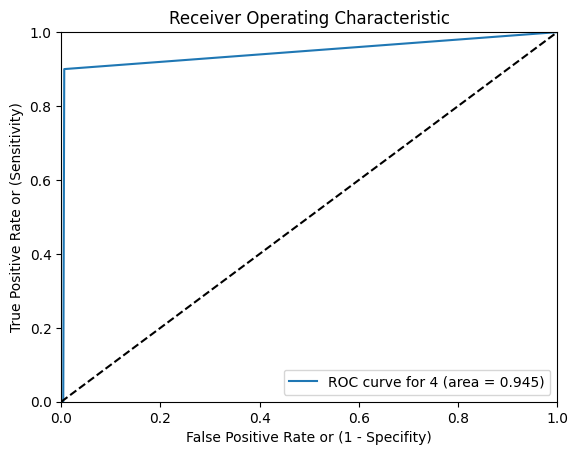

In [72]:
preprocess('syscalls/snd-cert/snd-cert.3.test')
get_auc_unix(4, 'syscalls/snd-cert/snd-cert.3.test', 'input.txt', plot=True)

Value for r is: 4; The AUC is: 0.9812


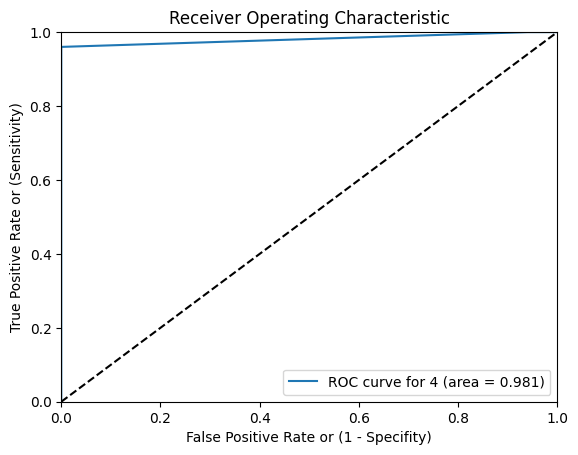

In [73]:
preprocess('syscalls/snd-unm/snd-unm.1.test')
get_auc_unix(4, 'syscalls/snd-unm/snd-unm.1.test', 'input.txt', plot=True)

Value for r is: 4; The AUC is: 0.97612


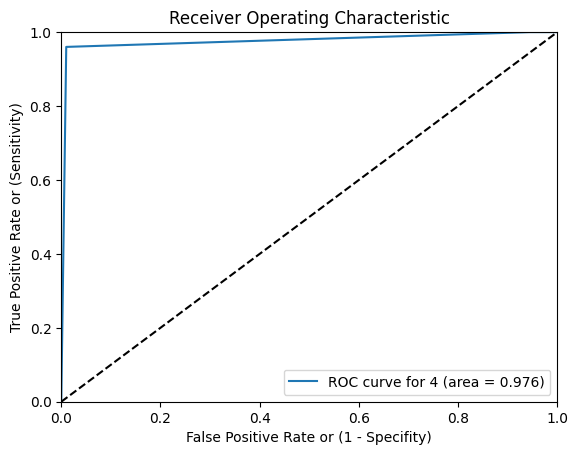

In [74]:
preprocess('syscalls/snd-unm/snd-unm.2.test')
get_auc_unix(4, 'syscalls/snd-unm/snd-unm.2.test', 'input.txt', plot=True)

Value for r is: 4; The AUC is: 0.9673299999999999


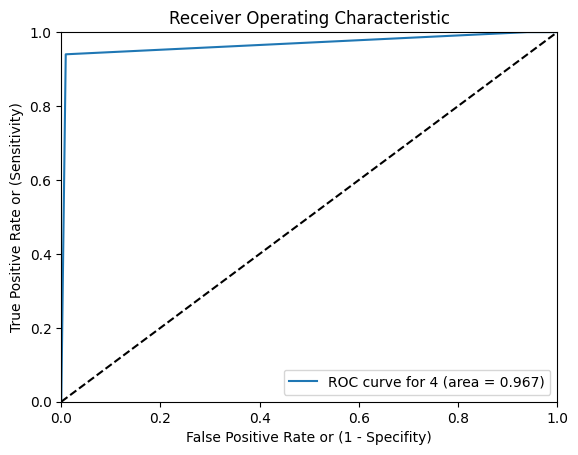

In [75]:
preprocess('syscalls/snd-unm/snd-unm.3.test')
get_auc_unix(4, 'syscalls/snd-unm/snd-unm.3.test', 'input.txt', plot=True)